In [3]:
import match_prepare as match
import matplotlib.pyplot as plt
import numpy as np
import imutils
import glob
import cv2
import copy
import pickle

In [4]:
def horizontal_projection(image_h):
    image = image_h.copy()
    image[image < 127] = 1
    image[image >= 127] = 0
    h_projection = np.sum(image, axis=1)

    return h_projection

def detect_horizontal_line(h_projection, pixel_limit_ste, pixel_limit_ets):
    # Detect line horizontal
    up_flag = 0
    down_flag = 0
    # pixel_limit = 5
    start_to_end = 0
    end_to_start = pixel_limit_ets + 1
    start_point = []
    for x in range(len(h_projection)):
        if h_projection[x] > 0 and up_flag == 1:
            start_to_end += 1

        if h_projection[x] == 0 and up_flag == 1:
            # print(start_to_end)
            start_point.append(x)
            # print(start_point)
            if start_to_end < pixel_limit_ste:
                del(start_point[len(start_point) - 1])
                # print('delete ste')
                down_flag = 0
                up_flag = 1
            else:
                down_flag = 1
                up_flag = 0
                start_to_end = 0

        if h_projection[x] == 0 and down_flag == 1:
            end_to_start += 1

        if h_projection[x] > 0 and up_flag == 0:
            start_point.append(x)
            # print(start_point)
            if end_to_start < pixel_limit_ets:
                del(start_point[len(start_point)-1])
                del(start_point[len(start_point)-1])
            up_flag = 1
            down_flag = 0
            end_to_start = 0

    if len(start_point) % 2 != 0:
        if h_projection[len(h_projection) - 1] > 0:
            start_point.append(len(h_projection) - 1)

    return start_point

In [5]:
def concat_image(img_original):
    # Get concat image to square
    height, width = img_original.shape
    if height > width:
        concatenate_a = int(round(height - width)/2)
        concatenate_b = height - width - concatenate_a
        beside = True
    else:
        concatenate_a = int(round(width - height)/2)
        concatenate_b = width - height - concatenate_a
        beside = False

    if beside:
        concatenate_a = np.full((height, concatenate_a), 255, dtype=np.uint8)
        concatenate_b = np.full((height, concatenate_b), 255, dtype=np.uint8)
        concatImage = np.concatenate(
            (concatenate_a, img_original, concatenate_b), axis=1
        )
    else:
        concatenate_a = np.full((concatenate_a, width), 255, dtype=np.uint8)
        concatenate_b = np.full((concatenate_b, width), 255, dtype=np.uint8)
        concatImage = np.concatenate(
            (concatenate_a, img_original, concatenate_b), axis=0
        )

    return concatImage

In [6]:
def font(imagePath, image):
    char_list_nameonly = [
    'Alif‬', 'Bā’', 'Tā’', 'Ṡā’‬', 'Jīm', 'h_Ḥā’‬', 'Khā’‬',
    'Dāl‬', 'Żāl‬', 'Rā’‬', 'zai‬', 'sīn‬', 'syīn‬', 's_ṣād',
    'd_ḍād'
    , 't_ṭā’‬', 'z_ẓȧ’‬', '‘ain', 'gain‬', 'fā’‬', 'qāf‬',
    'kāf‬', 'lām‬', 'mīm‬', 'nūn‬', 'wāw‬', 'hā’‬', 'yā’‬'
    ]
    # LPMQ_Font
    # print("LPMQ")
    loc_list_LPMQ = sorted(glob.glob('./marker/LPMQ/*.png'))
    font_LPMQ = FontWrapper(thresh_list={'tanwin_1': 0.7,
                                         'tanwin_2': 0.7,
                                         'nun_stand': 0.55,
                                         'nun_beg_1': 0.7,
                                         'nun_beg_2': 0.7,
                                         'nun_mid': 0.7,
                                         'nun_end': 0.6,
                                         'mim_stand': 0.7,
                                         'mim_beg': 0.8,
                                         'mim_mid': 0.7,
                                         'mim_end_1': 0.7,
                                         'mim_end_2': 0.7},
                            loc_list=loc_list_LPMQ, image_loc=imagePath,
                            image=image, visualize=False, nms_thresh=0.3,
                            numstep=30)
    # AlQalam_Font
    # print("AlQalam")
    loc_list_AlQalam = sorted(glob.glob('./marker/AlQalam/*.png'))
    font_AlQalam = FontWrapper(thresh_list={'tanwin_1': 0.7,
                                            'tanwin_2': 0.56,
                                            'nun_stand': 0.8,
                                            'nun_beg': 0.7,
                                            'nun_mid': 0.7,
                                            'nun_end': 0.7,
                                            'mim_stand': 0.7,
                                            'mim_beg': 0.7,
                                            'mim_mid': 0.7,
                                            'mim_end': 0.7},
                               loc_list=loc_list_AlQalam, image_loc=imagePath,
                               image=image, visualize=False, nms_thresh=0.3)
    # meQuran_Font
    # print("meQuran")
    loc_list_meQuran = sorted(glob.glob('./marker/meQuran/*.png'))
    font_meQuran = FontWrapper(thresh_list={'tanwin_1': 0.7,
                                            'tanwin_2': 0.65,
                                            'nun_stand': 0.7,
                                            'nun_beg_1': 0.7,
                                            'nun_beg_2': 0.7,
                                            'nun_mid': 0.7,
                                            'nun_end': 0.7,
                                            'mim_stand': 0.7,
                                            'mim_beg': 0.7,
                                            'mim_mid': 0.7,
                                            'mim_end_1': 0.7,
                                            'mim_end_2': 0.68},
                               loc_list=loc_list_meQuran, image_loc=imagePath,
                               image=image, visualize=False, nms_thresh=0.3)
    # PDMS_Font
    # print("PDMS")
    loc_list_PDMS = sorted(glob.glob('./marker/PDMS/*.png'))
    font_PDMS = FontWrapper(thresh_list={'tanwin_1': 0.7,
                                         'tanwin_2': 0.7,
                                         'nun_stand': 0.7,
                                         'nun_beg': 0.65,
                                         'nun_mid': 0.7,
                                         'nun_end': 0.7,
                                         'mim_stand': 0.7,
                                         'mim_beg': 0.7,
                                         'mim_mid': 0.7,
                                         'mim_end': 0.65},
                            loc_list=loc_list_PDMS, image_loc=imagePath,
                            image=image, visualize=False, nms_thresh=0.3)
    
    # AlKareem_Font
    loc_list_AlKareem = sorted(glob.glob('./marker/AlKareem/*.png'))
    font_AlKareem = FontWrapper(thresh_list={'tanwin_1': 0.7,
                                         'tanwin_2': 0.7,
                                         'nun_stand': 0.7,
                                         'nun_beg': 0.65,
                                         'nun_mid': 0.7,
                                         'nun_end': 0.7,
                                         'mim_stand': 0.7,
                                         'mim_beg': 0.7,
                                         'mim_mid': 0.7,
                                         'mim_end': 0.65,
                                         'mim_end': 0.65},
                            loc_list=loc_list_AlKareem, image_loc=imagePath,
                            image=image, visualize=False, nms_thresh=0.3)

    # KFGQPC_Font
    loc_list_KFGQPC = sorted(glob.glob('./marker/KFGQPC/*.png'))
    font_KFGQPC = FontWrapper(thresh_list={'tanwin_1': 0.7,
                                         'tanwin_2': 0.7,
                                         'nun_stand': 0.7,
                                         'nun_beg': 0.65,
                                         'nun_beg': 0.65,
                                         'nun_mid': 0.7,
                                         'nun_end': 0.7,
                                         'mim_stand': 0.7,
                                         'mim_beg': 0.7,
                                         'mim_mid': 0.7,
                                         'mim_end': 0.65},
                            loc_list=loc_list_KFGQPC, image_loc=imagePath,
                            image=image, visualize=False, nms_thresh=0.3)

    # Amiri_Font
    loc_list_Amiri = sorted(glob.glob('./marker/amiri/*.png'))
    font_Amiri = FontWrapper(thresh_list={'tanwin_1': 0.7,
                                         'tanwin_2': 0.7,
                                         'nun_stand': 0.7,
                                         'nun_beg': 0.65,
                                         'nun_beg': 0.65,
                                         'nun_beg': 0.65,
                                         'nun_mid': 0.7,
                                         'nun_end': 0.7,
                                         'mim_stand': 0.7,
                                         'mim_beg': 0.7,
                                         'mim_mid': 0.7,
                                         'mim_end': 0.65,
                                         'mim_end': 0.65},
                            loc_list=loc_list_Amiri, image_loc=imagePath,
                            image=image, visualize=False, nms_thresh=0.3)
    
    # Norehidayat_Font
    loc_list_Norehidayat = sorted(glob.glob('./marker/norehidayat/*.png'))
    font_Norehidayat = FontWrapper(thresh_list={'tanwin_1': 0.7,
                                         'tanwin_2': 0.7,
                                         'nun_stand': 0.7,
                                         'nun_beg': 0.65,
                                         'nun_beg': 0.65,
                                         'nun_end': 0.7,
                                         'mim_stand': 0.7,
                                         'mim_beg': 0.7,
                                         'mim_mid': 0.7,
                                         'mim_end': 0.65},
                            loc_list=loc_list_Norehidayat, image_loc=imagePath,
                            image=image, visualize=False, nms_thresh=0.3)
    
    # Norehira_Font
    loc_list_Norehira = sorted(glob.glob('./marker/norehira/*.png'))
    font_Norehira = FontWrapper(thresh_list={'tanwin_1': 0.7,
                                         'tanwin_2': 0.7,
                                         'nun_stand': 0.7,
                                         'nun_beg': 0.65,
                                         'nun_mid': 0.7,
                                         'nun_end': 0.7,
                                         'mim_stand': 0.7,
                                         'mim_beg': 0.7,
                                         'mim_mid': 0.7,
                                         'mim_end': 0.65,
                                         'mim_end': 0.65},
                            loc_list=loc_list_Norehira, image_loc=imagePath,
                            image=image, visualize=False, nms_thresh=0.3)
    
    # Norehuda_Font
    loc_list_Norehuda = sorted(glob.glob('./marker/norehuda/*.png'))
    font_Norehuda = FontWrapper(thresh_list={'tanwin_1': 0.7,
                                         'tanwin_2': 0.7,
                                         'nun_stand': 0.7,
                                         'nun_beg': 0.65,
                                         'nun_mid': 0.7,
                                         'nun_end': 0.7,
                                         'mim_stand': 0.7,
                                         'mim_beg': 0.7,
                                         'mim_mid': 0.7,
                                         'mim_end': 0.65},
                            loc_list=loc_list_Norehuda, image_loc=imagePath,
                            image=image, visualize=False, nms_thresh=0.3)

    list_object_font = [font_LPMQ, font_AlQalam, font_meQuran, font_PDMS,
                        font_AlKareem, font_KFGQPC, font_Amiri, font_Norehidayat,
                        font_Norehira, font_Norehuda]

    return list_object_font

In [7]:
def image_processing_blok(imagePath):
    original_image = cv2.imread(imagePath)
    gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    # template = cv2.Canny(gray, 50, 200)
#     Otsu threshold
    ret_img, image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY
                                   + cv2.THRESH_OTSU)
    # Simple threshold
    # ret_img, image2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    # Adaptive threshold value is the mean of neighbourhood area
    # image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    #                               cv2.THRESH_BINARY, 11, 2)
    
    # Adaptive threshold value is the weighted sum of neighbourhood
    # values where weights are a gaussian window
#     image = cv2.adaptiveThreshold(gray, 255,
#                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                   cv2.THRESH_BINARY, 11, 2)

    # cv2.imshow('otsu', image1)
    # cv2.imshow('simple', image2)
    # cv2.imshow('adapt mean', image3)
    # cv2.imshow('adapt gaussian', image)
    # cv2.waitKey(0)
    # image = cv2.bitwise_not(image)
    # kernel = np.ones((1,1), np.uint8)
    # dilation = cv2.dilate(final_img.copy(),kernel,iterations = 1)
    # kernel = np.ones((2,2), np.uint8)
    # image = cv2.erode(image,kernel,iterations = 1)
    # image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    # image = cv2.bitwise_not(image)
    # closing = cv2.morphologyEx(final_img.copy(), cv2.MORPH_CLOSE, kernel)
    # cv2.imshow('morph', image)
    # print('morph')
    # cv2.waitKey(0)

    input_image = match.ImageProcessing(original_image=original_image.copy())
    input_image.horizontal_projection(image.copy())  # adaptive binaryimage
    input_image.detect_horizontal_line(
        image=original_image.copy(),
        pixel_limit_ste=5,  # Start to end
        pixel_limit_ets=5   # End to start
    )  # Got self.start_point_h
    # cv2.imshow('from main', input_image.original_image)
    bag_h_original = input_image.start_point_h
    input_image.crop_image(h_point=input_image.start_point_h,
                           input_image=original_image.copy())  # crop ori

    marker_height_list = []
    font_list = font(imagePath=imagePath, image=gray)
    for font_object in font_list:
        for location in font_object.get_marker_location():
            temp = cv2.imread(location)
            h, _, _ = temp.shape
            marker_height_list.append(h)

    # Block font processing
    count = 0
    save_state = {}
    for image in input_image.bag_of_h_crop:
        # Get original cropped one line binary image
        temp_image_ori = input_image.bag_of_h_crop[image]
        h, _, _ = temp_image_ori.shape
        # Scaled image by height ratio
        scaled_one_line_img_size = 1.3 * max(marker_height_list)
        if h > scaled_one_line_img_size:
            scale = scaled_one_line_img_size / h
            temp_image_ori = imutils.resize(temp_image_ori,
                                            height=int(h * scale))
        else:
            scale = 1
        if scale != 1:
            print('Scalling image to ' + str(scale))

        gray = cv2.cvtColor(temp_image_ori, cv2.COLOR_BGR2GRAY)
        temp_image = cv2.adaptiveThreshold(gray, 255,
                                           cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY, 11, 2)
        # temp_image = temp_image_ori
        # Calculate base line processing from self.h_projection
        input_image.horizontal_projection(temp_image.copy())
        input_image.base_line(one_line_image=temp_image_ori)
        oneline_baseline = []
        oneline_baseline.append(input_image.base_start)
        oneline_baseline.append(input_image.base_end)
        if oneline_baseline[1] < oneline_baseline[0]:
            temp = oneline_baseline[0]
            oneline_baseline[0] = oneline_baseline[1]
            oneline_baseline[1] = temp
#         cv2.imshow('Base start =' + str(input_image.base_start)
#                    + ' end =' + str(input_image.base_end),
#                    input_image.one_line_image)
#         print('>')
#         cv2.waitKey(0)
#         cv2.destroyWindow('Base start =' + str(input_image.base_start)
#                           + ' end =' + str(input_image.base_end))

        # Font_Processing
        font_list = font(imagePath=imagePath, image=gray)
        max_font_value = 0
        font_type = 0
        numstep = 20
        # Looking for font type by the greatest value
        for font_object in font_list:
            font_object.run(numstep=numstep)
            for value in font_object.get_object_result().values():
                # print(value)
                if type(value) == float:
                    if value > max_font_value:
                        max_font_value = value
                        font_type = font_object

        if isinstance(font_type, type(font_list[0])):
            object_result = font_type.get_object_result()
            print('into eight connectivity')
            input_image.eight_connectivity(
                temp_image.copy(), oneline_baseline
            )
            conn_pack_sorted = copy.deepcopy(
                input_image.conn_pack_sorted
            )
            conn_pack_minus_body = copy.deepcopy(
                input_image.conn_pack_minus_body
            )
            # font_type.display_marker_result(input_image=temp_image_ori)
        else:
            object_result = False
            print('Not a valuable result found check the numstep!')
            continue
            # cv2.waitKey(0)

        # Crop next word marker wether it's inside or beside
        crop_words = {}
        if object_result:
            # Grouping marker by its v_projection
            input_image.grouping_marker()
            group_marker_by_wall = copy.deepcopy(
                input_image.group_marker_by_wall
            )
#             print(object_result)
#             cv2.waitKey(0)
            for data in object_result:
                if isinstance(object_result[data], type(np.array([]))):
                    temp_x = object_result[data]
                    part = data.split('_')
                    name = []
                    for x in range(len(part)):
                        if x == 0:
                            continue
                        if x == len(part) - 1:
                            name.append(part[x])
                        else:
                            name.append(part[x] + '_')
                    name = ''.join(name)
                    # crop_words['ordinat_' + name]=temp_x
                    for arr in range(len(temp_x)):
                        x2 = (temp_x)[arr][2]  # x2 is on the right
                        x1 = (temp_x)[arr][0]  # x1 is on the left
                        mid_x = x1 + round((x2 - x1)/2)  # x in the middle
#                         print('ordinat ' + data + '={}'.format(x))
                        # marker_width = (temp_x[arr][2]) - x
                        wall_count = -1
                        for wall in group_marker_by_wall:
                            wall_count += 1
                            if wall[0] <= mid_x <= wall[1]:
                                break
#                         cv2.waitKey(0)
                        wall = group_marker_by_wall.keys()
                        wall = list(wall)
                        found_in_wall = False
                        for region in group_marker_by_wall[
                                wall[wall_count]]:
                            if found_in_wall:
                                break
                            region_yx = conn_pack_minus_body[
                                    region]
                            for y_x in region_yx:
                                if y_x[1] < x1:
#                                     print('add inside wall')
                                    crop_words['final_inside_' + name
                                               + '_' + str(arr)] \
                                        = wall[wall_count]
                                    crop_words['ordinat_' + name
                                               + '_' + str(arr)] \
                                        = temp_x[arr]
                                    found_in_wall = True
                                    break
                        if not found_in_wall:
                            if wall_count > 0:
                                next_wall = wall[wall_count - 1]
                                found_next_wall = False
                                if group_marker_by_wall[next_wall] != []:
#                                     print('add next wall')
                                    crop_words['final_beside_'
                                               + name + '_' + str(arr)] \
                                        = next_wall
                                    crop_words['ordinat_' + name
                                               + '_' + str(arr)] \
                                        = temp_x[arr]
                                    found_next_wall = True
                                if not found_next_wall and wall_count > 1:
                                    beside_next_wall = wall[wall_count - 2]
                                    if group_marker_by_wall[
                                            beside_next_wall] != []:
#                                         print('add beside next wall')
                                        crop_words['final_beside_'
                                                   + name + '_'
                                                   + str(arr)] \
                                            = beside_next_wall
                                        crop_words['ordinat_' + name
                                                   + '_' + str(arr)] \
                                            = temp_x[arr]

            font_type.display_marker_result(input_image=temp_image_ori)

        # Looking for final segmented character
        # print(crop_words_final)
        # for key in crop_words_final:
        print('CROP WORDS = ', crop_words)
        for key in crop_words:
            name = key.split('_')
            if name[0] == 'final':
                save_state[count] = []
                count += 1
                # x_value = crop_words_final[key]
                x_value = crop_words[key]
                # print(x_value)
                join = []
                for x in range(len(name)):
                    if x == 0:
                        continue
                    if x == 1:
                        continue
                    if x == len(name) - 1:
                        join.append(name[x])
                        # print(name[x])
                    else:
                        join.append(name[x] + '_')
                        # print(name[x])
                join = ''.join(join)
                save_state[count-1].append(join)
                print('join = {}'.format(join))

                # List available for final segmented char
                final_segmented_char = temp_image.copy()
                final_segmented_char[:] = 255
                if name[1] == 'beside':
                    # final_img = temp_image.copy()[:, x_value[0]:x_value[1]]
                    final_img = input_image.image_join.copy()[
                        :, x_value[0]:x_value[1]]
                    w_height, w_width = final_img.shape
#                     cv2.imshow('beside', final_img)
                    final_segmented_char, pass_x1 \
                        = input_image.find_final_processed_char(
                            x_value, oneline_baseline
                    )
                    if final_segmented_char == 'continue':
                        print(
                            '>> from main to continue next word candidate'
                        )
                        continue
                    else:
                        save_state[count-1].append(scale)
                        save_state[count-1].append(bag_h_original[image])
                        save_state[count-1].append(
                            crop_words['ordinat_' + join]
                        )
                        save_state[count-1].append(final_segmented_char)
                        save_state[count-1].append(pass_x1)

                if name[1] == 'inside':
                    x1_ordinat = crop_words['ordinat_' + join][0]
                    # x1_ordinat = crop_words_final['ordinat_' + join][0]
                    # Cut before the detected char marker
#                     print('x1_ordinat = {}'.format(x1_ordinat))
#                     cv2.waitKey(0)
                    # final_img = temp_image.copy()[:, x_value[0]:x1_ordinat]
                    final_img = input_image.image_join.copy()[
                        :, x_value[0]:x1_ordinat]
                    w_height, w_width = final_img.shape
#                     cv2.imshow('inside', final_img)
                    final_wall = (x_value[0], x1_ordinat)
                    final_segmented_char, pass_x1 \
                        = input_image.find_final_processed_char(
                            final_wall, oneline_baseline
                    )
                    if final_segmented_char == 'continue':
                        print(
                            '>> from main to continue next word candidate'
                        )
                        continue
                    else:
                        save_state[count-1].append(scale)
                        save_state[count-1].append(bag_h_original[image])
                        save_state[count-1].append(
                            crop_words['ordinat_' + join]
                        )
                        save_state[count-1].append(final_segmented_char)
                        save_state[count-1].append(pass_x1)

    return save_state

In [7]:
# model_name = './Colab/best_model_DenseNet_SK.pkl'
# model_name = './Colab/best_model_DenseNet_DK.pkl'
model_name = './Colab/best_model_DenseNet_DD.pkl'
model = pickle.load(open(model_name, 'rb'))

Using TensorFlow backend.


In [8]:
iqlab = [1]
idgham_bigunnah = [23, 24, 25, 27]
idgham_bilagunnah = [9, 22]
idzhar_halqi = [0, 26, 17, 18, 5, 6 ]
ikhfa_hakiki = [2, 3, 4, 7, 8,10, 11, 12, 13, 14, 15, 16, 19, 20, 21]
ikhfa_syafawi = [1]
idgham_mimi = [23]
idzhar_syafawi = [23, 1] # NOT
font_text = cv2.FONT_HERSHEY_PLAIN
WHITE = (255, 0, 0)
GREEN = (0, 255, 0)

In [18]:
for imagePath in sorted(glob.glob("temp" + "/*.png")):
    print('________________Next File_________________')
    original_image = cv2.imread(imagePath)
    save_state = image_processing_blok(imagePath)
#     print(save_state)
    # Final segmented char recognition
    char_recog = []
    for x in save_state:
        if len(save_state[x]) < 1:
            continue
        start_point = detect_horizontal_line(horizontal_projection(save_state[x][4]), 0, 50)
        cut_image = save_state[x][4][start_point[0]:start_point[1],:]
        # DD
        image_32_dd = cv2.resize(cut_image, (32, 32))
        # DK
#         square_img = concat_image(cut_image)
#         image_32_dk = cv2.resize(square_img, (32, 32))
#         plt.figure(x)
#         plt.imshow(image_32_dd, cmap='gray')
#         char_recog.append(image_32_dk)
        char_recog.append(image_32_dd)
    
    if len(save_state) > 0:
        char_recog = np.array(char_recog)
        char_recog = char_recog.reshape(-1, 32, 32, 1).astype(np.float32)/255

        y_pred = model.predict(char_recog)
        y_pred = np.argmax(y_pred, axis = 1)
    
    for x in save_state:
        if len(save_state[x]) < 1:
            continue
        h, w = save_state[x][4].shape
        marker = save_state[x][0].split('_')
        char_box = save_state[x][3] / save_state[x][1]
#         final_box = [
#             int(char_box[0]) - int(w / save_state[x][1]),
#             int(char_box[1]) + save_state[x][2], int(char_box[2]),
#             int(char_box[3]) + save_state[x][2] + int(char_box[3]) - int(char_box[1])
#         ]
        final_box = [
            int(save_state[x][5] / save_state[x][1]),
            save_state[x][2]+10, int(char_box[2]),
            int(char_box[3]) + save_state[x][2]
        ]
        found = False
        if marker[0] == 'nun' or marker[0] == 'tanwin':
            if y_pred[x] == iqlab[0]:
                cv2.rectangle(original_image, (final_box[0], final_box[1]),
                              (final_box[2], final_box[3]), GREEN, 2)
                cv2.putText(original_image, 'iqlab', 
                            (final_box[0], final_box[3] + 5), font_text, 1, WHITE)
                print('iqlab')
                continue
            for c in idgham_bilagunnah:
                if y_pred[x] == c:
                    print('idgham bilagunnah')
                    cv2.rectangle(original_image, (final_box[0], final_box[1]),
                              (final_box[2], final_box[3]), GREEN, 2)
                    cv2.putText(original_image, 'idgham bilagunnah', 
                                (final_box[0], final_box[3] + 5), font_text, 1, WHITE)
                    found = True
                    break
            if found:
                continue
            for c in idgham_bigunnah:
                if y_pred[x] == c:
                    print('idgham bigunnah')
                    cv2.rectangle(original_image, (final_box[0], final_box[1]),
                              (final_box[2], final_box[3]), GREEN, 2)
                    cv2.putText(original_image, 'idgham bigunnah', 
                                (final_box[0], final_box[3] + 5), font_text, 1, WHITE)
                    found = True
                    break
            if found:
                continue
            for c in idzhar_halqi:
                if y_pred[x] == c:
                    print('idzhar halqi')
                    cv2.rectangle(original_image, (final_box[0], final_box[1]),
                              (final_box[2], final_box[3]), GREEN, 2)
                    cv2.putText(original_image, 'idzhar halqi', 
                                (final_box[0], final_box[3] + 5), font_text, 1, WHITE)
                    found = True
                    break
            if found:
                continue
            for c in ikhfa_hakiki:
                if y_pred[x] == c:
                    print('ikhfa hakiki')
                    cv2.rectangle(original_image, (final_box[0], final_box[1]),
                              (final_box[2], final_box[3]), GREEN, 2)
                    cv2.putText(original_image, 'ikhfa hakiki', 
                                (final_box[0], final_box[3] + 5), font_text, 1, WHITE)
                    found = True
                    break
            if found:
                continue

        elif marker[0] == 'mim':
            if y_pred[x] == ikhfa_syafawi[0]:
                print('ikfha syafawi')
                cv2.rectangle(original_image, (final_box[0], final_box[1]),
                              (final_box[2], final_box[3]), GREEN, 2)
                cv2.putText(original_image, 'ikhfa syafawi', 
                            (final_box[0], final_box[3] + 5), font_text, 1, WHITE)
                continue
            elif y_pred[x] == idgham_mimi[0]:
                print('idgham mimi')
                cv2.rectangle(original_image, (final_box[0], final_box[1]),
                              (final_box[2], final_box[3]), GREEN, 2)
                cv2.putText(original_image, 'idgham mimi', 
                            (final_box[0], final_box[3] + 5), font_text, 1, WHITE)
                continue
            else:
                print('idzhar syafawi')
                cv2.rectangle(original_image, (final_box[0], final_box[1]),
                              (final_box[2], final_box[3]), GREEN, 2)
                cv2.putText(original_image, 'idzhar syafawi', 
                            (final_box[0], final_box[3] + 5), font_text, 1, WHITE)
                
    cv2.imshow('Final Result', original_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

________________Next File_________________
run() Marker Font
numstep =  30
run() Marker Font
numstep =  20
run() Marker Font
numstep =  20
run() Marker Font
numstep =  20
Not a valuable result found check the numstep!
Scalling image to 0.43333333333333335
run() Marker Font
numstep =  30
run() Marker Font
numstep =  20
run() Marker Font
numstep =  20
run() Marker Font
numstep =  20
Not a valuable result found check the numstep!
Scalling image to 0.45348837209302323
run() Marker Font
numstep =  30
run() Marker Font
numstep =  20
run() Marker Font
numstep =  20
run() Marker Font
numstep =  20
into eight connectivity
CROP WORDS =  {'final_beside_nun_stand_0': (581, 614), 'ordinat_nun_stand_0': array([632,  32, 662,  87])}
join = nun_stand_0
Scalling image to 0.44724770642201833
run() Marker Font
numstep =  30


/home/mhbrt/.virtualenvs/tf2/local/lib/python3.6/site-packages/ipykernel_launcher.py:257: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


run() Marker Font
numstep =  20
run() Marker Font
numstep =  20
run() Marker Font
numstep =  20
into eight connectivity
CROP WORDS =  {}
Scalling image to 0.49744897959183676
run() Marker Font
numstep =  30
run() Marker Font
numstep =  20
run() Marker Font
numstep =  20
run() Marker Font
numstep =  20
into eight connectivity
CROP WORDS =  {'final_beside_tanwin_1_0': (804, 862), 'ordinat_tanwin_1_0': array([553,  13, 575,  35])}
join = tanwin_1_0
idgham bilagunnah
ikhfa hakiki


In [10]:
# save_state.keys()
# 64_DK
# DD_f32_WhiteOnBlack
# Hypothesis:
#     DD is the best (on size 64x64 or 32x32) compare with SK_64
#     WoB or BoW (compare with DD_f8)
#     WoB on DD_f32 (is it better than 97%?)
# -WoB DD_f32
# -64_DK on f6

In [11]:
# save_state

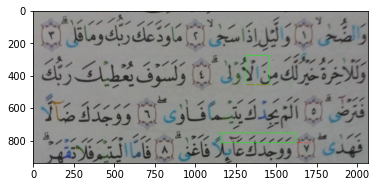

In [19]:
plt.imshow(original_image)

In [13]:
# cv2.imshow('e', original_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [14]:
# save_state[6][3]/save_state[6][1]

In [15]:
# final_box